###Image Shape Segmentation

This code segments all the shapes as individual components so that they can be individually shape identified and regularised

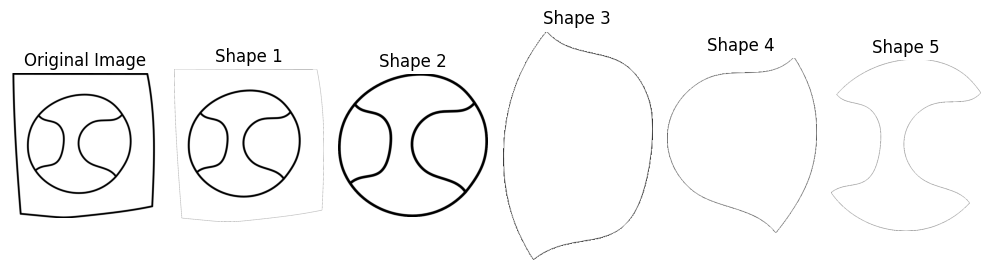

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_and_display_isolated_shapes(image_path):
    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold the image to invert the foreground and background
    _, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Finding contours
    contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Display original image
    plt.figure(figsize=(10, 6))
    plt.subplot(1, len(contours), 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Process each contour except the first which is the whole image
    for i, contour in enumerate(contours[1:], start=2):
        # Create mask for the current contour
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [contour], -1, 255, -1)  # Draw filled contour in mask

        # Extract only the current shape
        segmented_shape = np.zeros_like(gray)
        segmented_shape[mask == 255] = gray[mask == 255]

        # Get the bounding box of the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Crop the image to the bounding box with some padding
        cropped = segmented_shape[y:y+h, x:x+w]

        # Create an isolated view by setting non-shape areas to white
        isolated = np.full((h, w), 255, dtype=np.uint8)  # White background
        isolated[mask[y:y+h, x:x+w] == 255] = cropped[mask[y:y+h, x:x+w] == 255]

        # Display the isolated shape
        plt.subplot(1, len(contours), i)
        plt.imshow(isolated, cmap='gray')
        plt.title(f'Shape {i-1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example Usage
image_path = 'frag1.png'  # Change to the correct path
segment_and_display_isolated_shapes(image_path)
